In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

In [6]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [13]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


# Data Cleaning Assignment

In [23]:
#df.isnull().sum()*100/df.isnull().count()

In [20]:
#df["ENROLL"].fillna(df["ENROLL"].mean(), inplace=True)
#df["TOTAL_REVENUE"].fillna(df["TOTAL_REVENUE"].mean(), inplace=True)

#df.isnull().sum()*100/df.isnull().count()

In [72]:
#df.groupby('YEAR', as_index=False)['TOTAL_REVENUE'].mean()
#df["TOTAL_REVENUE"] = df.groupby("YEAR").transform(lambda x: x.fillna(x.mean()))

#df.isnull().sum()*100/df.isnull().count()

In [15]:
df3 = df.interpolate()
df3.isnull().sum()*100/df3.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          2.412869
TOTAL_REVENUE                   0.000000
FEDERAL_REVENUE                 0.000000
STATE_REVENUE                   0.000000
LOCAL_REVENUE                   0.000000
TOTAL_EXPENDITURE               0.000000
INSTRUCTION_EXPENDITURE         0.000000
SUPPORT_SERVICES_EXPENDITURE    0.000000
OTHER_EXPENDITURE               2.412869
CAPITAL_OUTLAY_EXPENDITURE      0.000000
GRADES_PK_G                     0.000000
GRADES_KG_G                     0.000000
GRADES_4_G                      0.000000
GRADES_8_G                      0.000000
GRADES_12_G                     0.000000
GRADES_1_8_G                    0.000000
GRADES_9_12_G                   0.000000
GRADES_ALL_G                    0.000000
AVG_MATH_4_SCORE                0.000000
AVG_MATH_8_SCORE                0.000000
AVG_READING_4_SCORE             0.000000
AVG_READING_8_SC

- Determine all the variable types and find the fraction of the missing values for each variable.

- Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
        
        • I ran code that replaced null vaules in "YEAR" and "ENROLL" with the mean value. I think doing that with all the columns minus the columns that begin with AVG since those seem too far gone as far as null values.
        
- Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
        
        • df["TOTAL_REVENUE"] = df.groupby("YEAR").transform(lambda x: x.fillna(x.mean()))
        
- This time, fill in the missing values using interpolation (extrapolation).

        • df.interpolate(method='pad', limit=2)
        
- Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

        • Interpolation is a quick way to replace null values with neighboring values. I feel this isn't the best way considering you could be duplicating bad data? I think using .groupby() with "YEAR" column and .mean() was a clean way of filling in null values.

# Outlier Assignment

    - Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
    - If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
    - Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
    - Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.
    - Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
    - If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

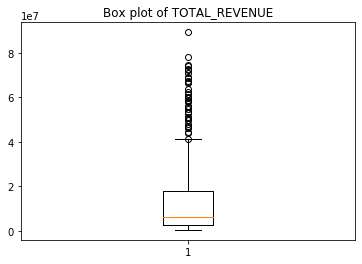

In [30]:
plt.boxplot(df3["TOTAL_REVENUE"])
plt.title("Box plot of TOTAL_REVENUE")
plt.show()

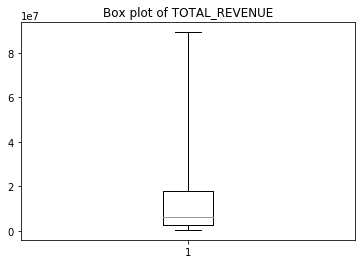

In [19]:
plt.boxplot(df3["TOTAL_REVENUE"], whis=20)
plt.title("Box plot of TOTAL_REVENUE")
plt.show()

In [25]:
winsorized_revenue = winsorize(df3["TOTAL_REVENUE"], (0, 0.10))

winsorized_revenue

masked_array(data=[ 2678885.,  1049591.,  3258079., ..., 23766529.,
                   23766529., 23766529.],
             mask=False,
       fill_value=1e+20)

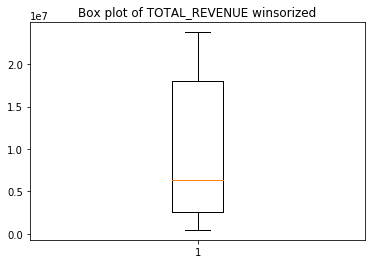

In [26]:
plt.boxplot(winsorized_revenue)
plt.title("Box plot of TOTAL_REVENUE winsorized")
plt.show()

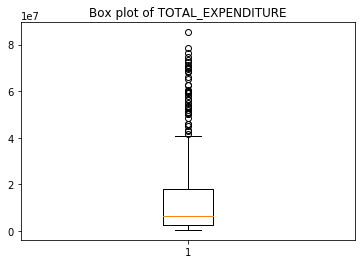

In [21]:
plt.boxplot(df3["TOTAL_EXPENDITURE"])
plt.title("Box plot of TOTAL_EXPENDITURE")
plt.show()

In [27]:
winsorized_expend = winsorize(df3["TOTAL_EXPENDITURE"], (0, 0.10))

winsorized_expend

masked_array(data=[ 2653798.,   972488.,  3401580., ..., 23352516.,
                   23352516., 23352516.],
             mask=False,
       fill_value=1e+20)

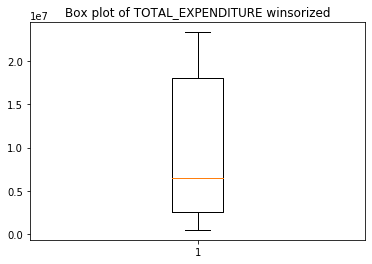

In [29]:
plt.boxplot(winsorized_expend)
plt.title("Box plot of TOTAL_EXPENDITURE winsorized")
plt.show()

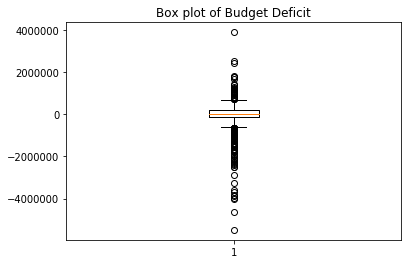

In [35]:
budget_deficit = df3["TOTAL_REVENUE"] - df3["TOTAL_EXPENDITURE"]
#print(budget_deficit)

plt.boxplot(budget_deficit)
plt.title("Box plot of Budget Deficit")
plt.show()

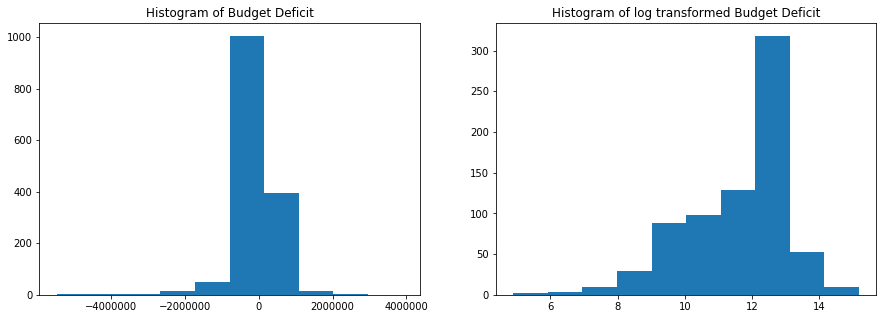

In [36]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(budget_deficit)
plt.title("Histogram of Budget Deficit")

plt.subplot(1,2,2)
plt.hist(np.log(budget_deficit))
plt.title("Histogram of log transformed Budget Deficit")
plt.show()

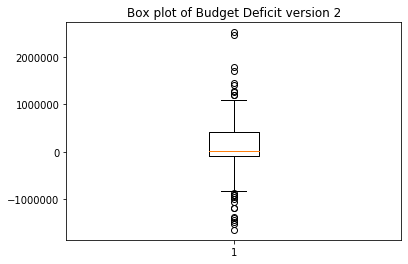

In [38]:
budget_deficit2 = winsorized_revenue - winsorized_expend

plt.boxplot(budget_deficit2)
plt.title("Box plot of Budget Deficit version 2")
plt.show()

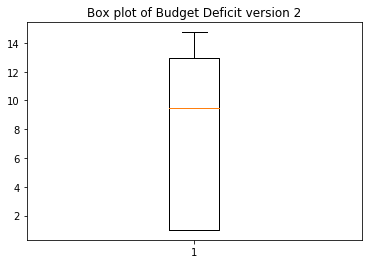

In [40]:
plt.boxplot(np.log(budget_deficit2))
plt.title("Box plot of Budget Deficit version 2")
plt.show()

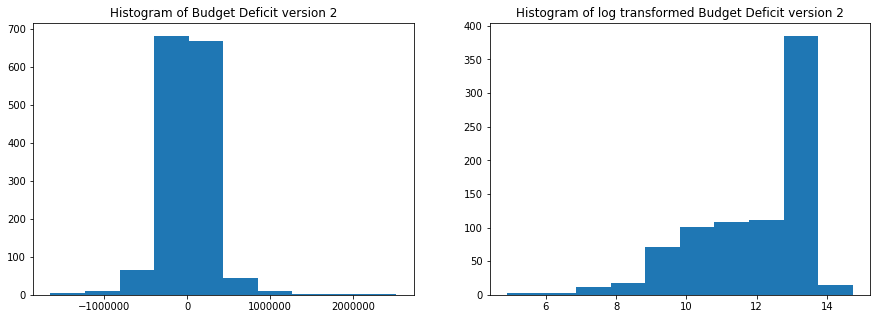

In [39]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(budget_deficit2)
plt.title("Histogram of Budget Deficit version 2")

plt.subplot(1,2,2)
plt.hist(np.log(budget_deficit2))
plt.title("Histogram of log transformed Budget Deficit version 2")
plt.show()

In [42]:
print(budget_deficit.mean())


print(np.log(budget_deficit.mean()))

65818.22888739947
11.094652113709275


### For question #6; Answer: I would choose the technique used in question #4

# Data exploration 1

    - Derive the descriptive statistics of the data and discuss the points you find remarkable.
    - Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
    - In your chosen state, which of the lessons are the students more successful, math or reading?
    - What are the distributions of the math and reading scores in the sample?
    - Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [74]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = df["STATE"].unique()

for state in states:
    df.loc[df["STATE"] == state, fill_list] = df.loc[df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
df.dropna(inplace=True)

In [75]:
df.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466,466,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
unique,465,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,NaN,NaN,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,NaN,NaN,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,NaN,NaN,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,NaN,NaN,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,NaN,NaN,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884


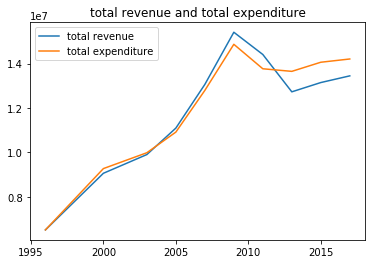

In [76]:
plt.plot(df.loc[df.STATE == "NORTH_CAROLINA", "YEAR"],
         df.loc[df.STATE == "NORTH_CAROLINA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(df.loc[df.STATE == "NORTH_CAROLINA", "YEAR"],
         df.loc[df.STATE == "NORTH_CAROLINA", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

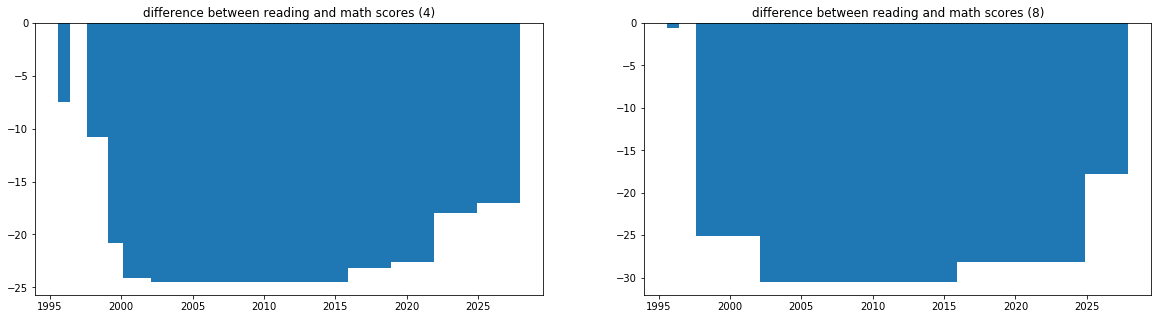

difference between reading and math scores (4)
242     -7.487662
450    -10.829025
606    -20.819546
709    -24.101101
814    -23.683951
922    -24.482414
1026   -23.160937
1130   -22.574018
1232   -17.931676
1480   -17.020487
dtype: float64
difference between reading and math scores (8)
242     -0.616324
450    -25.106754
606    -13.876677
709    -12.601007
814    -16.849818
922    -30.491681
1026   -14.188402
1130    -9.267401
1232   -28.103323
1480   -17.768444
dtype: float64


In [77]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(df.loc[df.STATE == "NORTH_CAROLINA", "YEAR"],
         df.loc[df.STATE == "NORTH_CAROLINA", "AVG_READING_4_SCORE"] - df.loc[df.STATE == "NORTH_CAROLINA", "AVG_MATH_4_SCORE"])

plt.title("difference between reading and math scores (4)")

plt.subplot(1,2,2)
plt.bar(df.loc[df.STATE == "NORTH_CAROLINA", "YEAR"],
         df.loc[df.STATE == "NORTH_CAROLINA", "AVG_READING_8_SCORE"] - df.loc[df.STATE == "NORTH_CAROLINA", "AVG_MATH_8_SCORE"])

plt.title("difference between reading and math scores (8)")

plt.show()

print("difference between reading and math scores (4)")
print(df.loc[df.STATE == "NORTH_CAROLINA", "AVG_READING_4_SCORE"] - df.loc[df.STATE == "NORTH_CAROLINA", "AVG_MATH_4_SCORE"])
print("difference between reading and math scores (8)")
print(df.loc[df.STATE == "NORTH_CAROLINA", "AVG_READING_8_SCORE"] - df.loc[df.STATE == "NORTH_CAROLINA", "AVG_MATH_8_SCORE"])


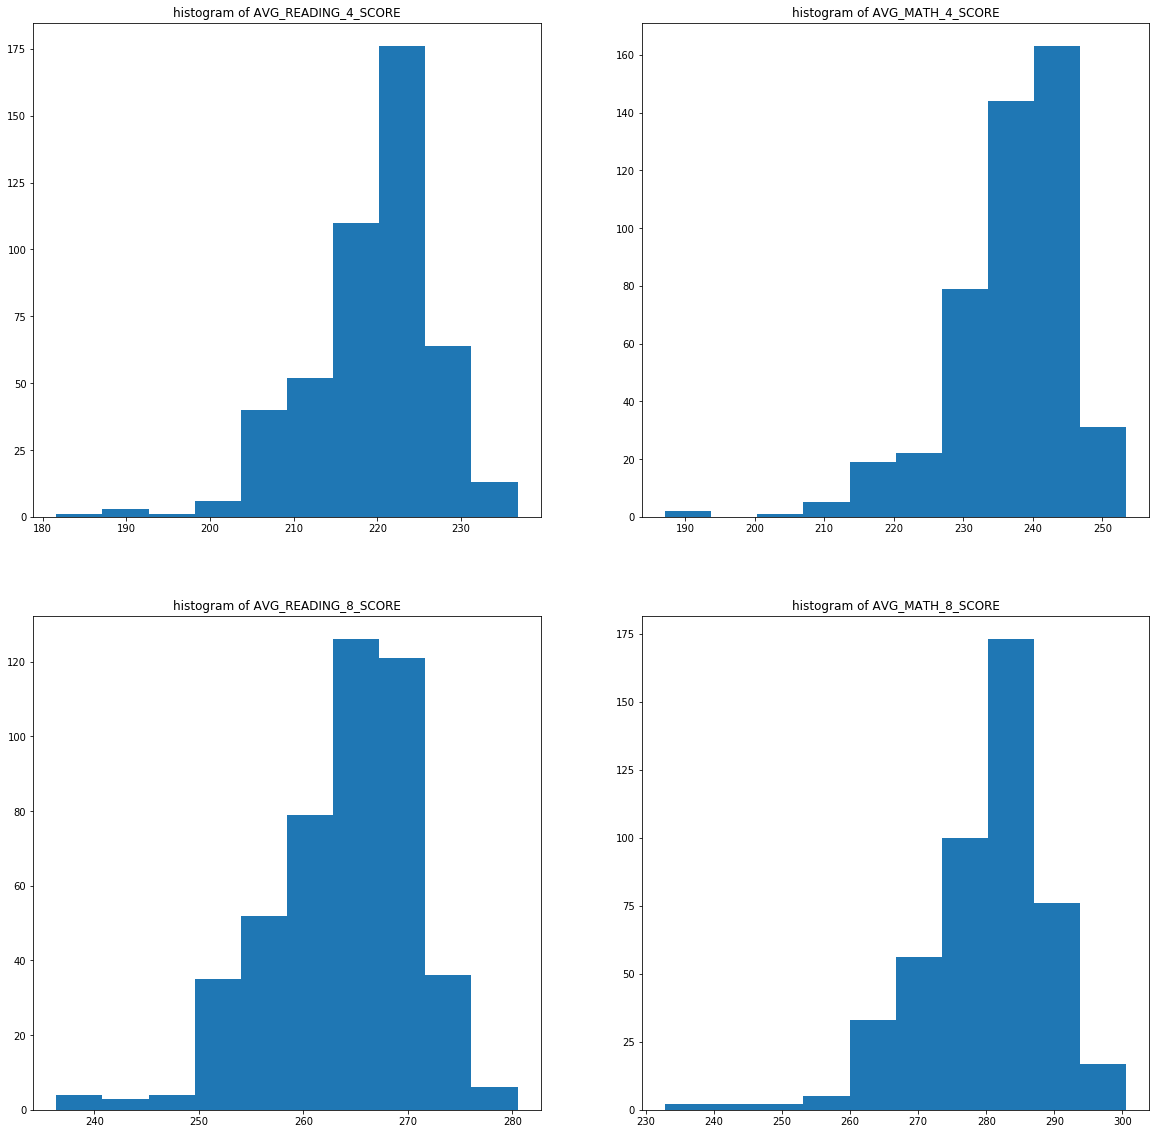

In [79]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

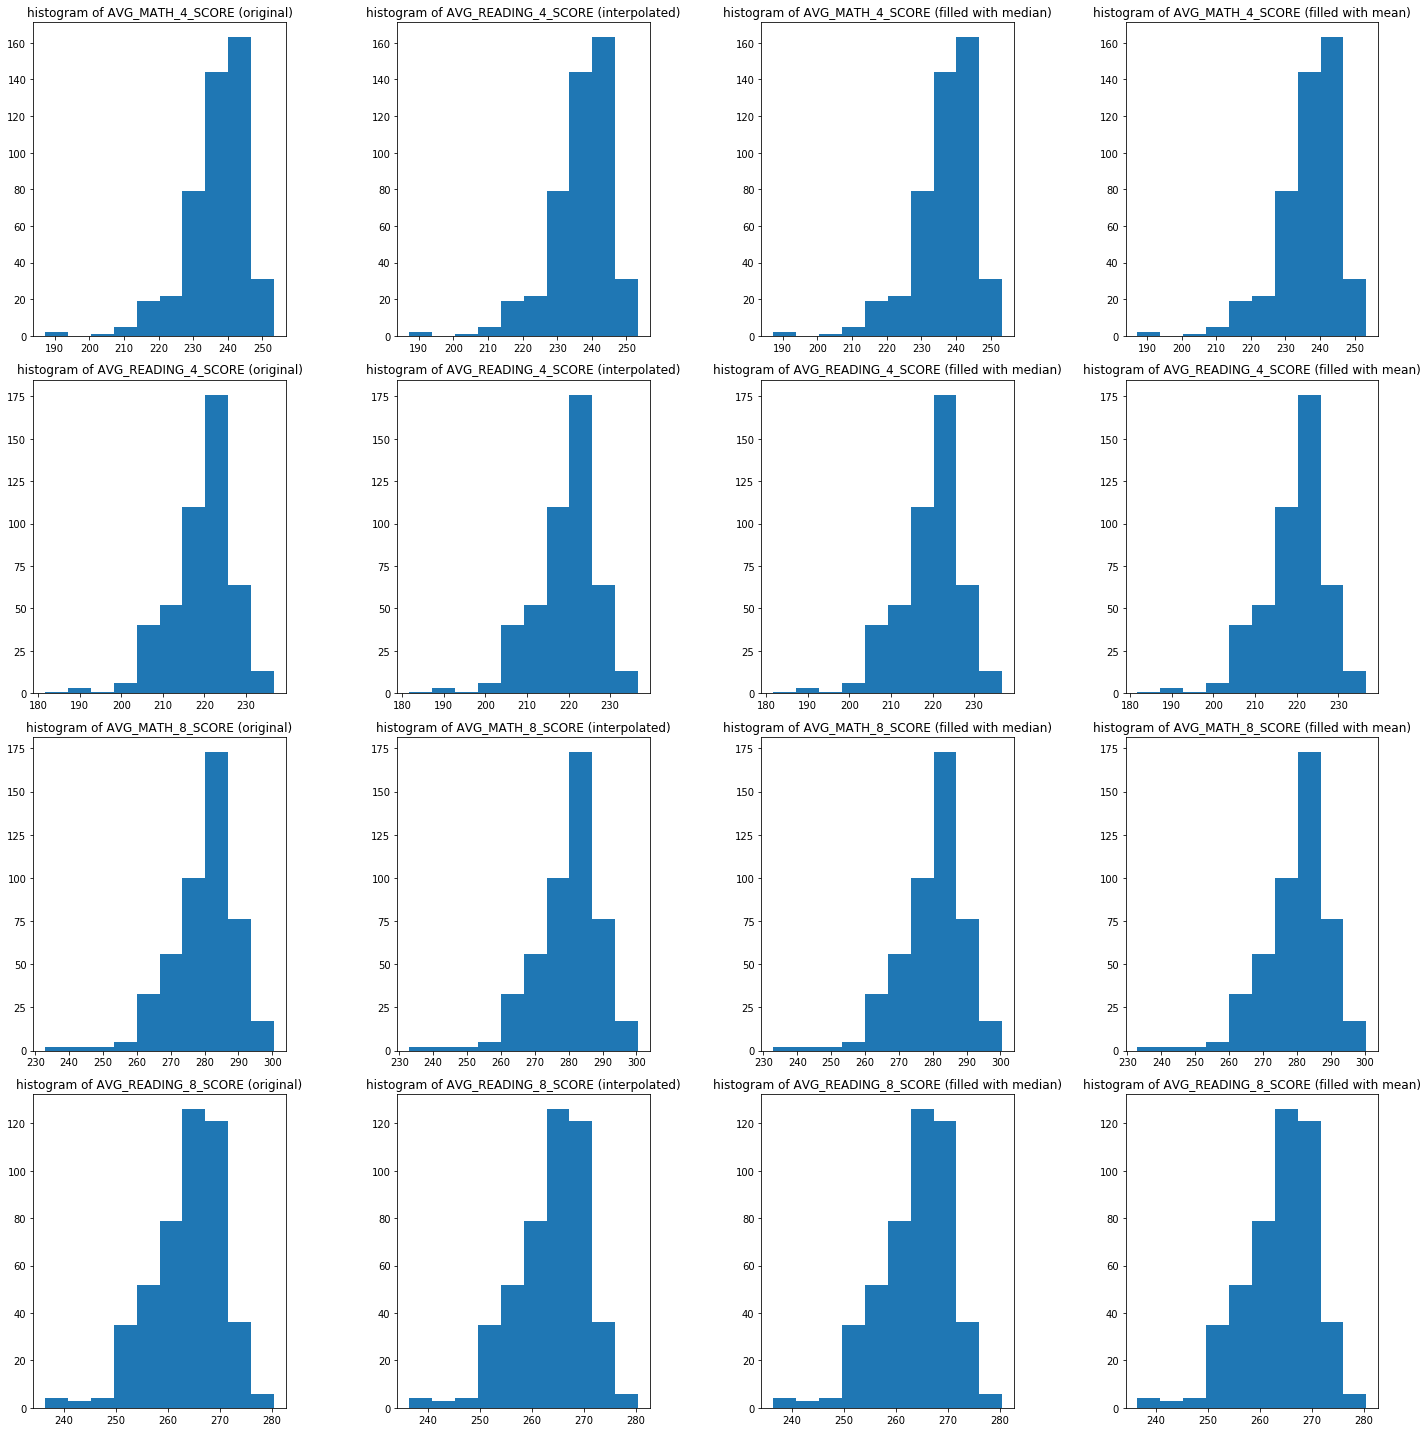

In [80]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()